In [4]:
# load the pridict, deepprime and conventional ML models
import os
import sys
import numpy as np
import pandas as pd
import pickle
import torch
import skorch

from models.deepprime import predict_deep_prime
from models.pridict import predict_pridict
from models.conventional_ml_models import MLP
from collections import defaultdict

# suppress warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

dataf = 'pd-adv-pe2'

data_dp = f'dp-{dataf}.csv'
data_pd = f'pd-{dataf}.csv'

prediction_pd, _ = predict_pridict(data_pd, num_features=24, device='cuda' if torch.cuda.is_available() else 'cpu', dropout=0)
prediction_dp, _ = predict_deep_prime(data_dp, num_features=24, dropout=0)

prediction_mlp = defaultdict(list)
prediction_rf = defaultdict(list)
prediction_xgb = defaultdict(list)
prediction_ridge = defaultdict(list)
prediction_lasso = defaultdict(list)

data = pd.read_csv(f'models/data/conventional-ml/ml-{dataf}.csv')
for i in range(5):
    fold = i + 1
    # load the test data
    X_test = data[data['fold'] == i].iloc[:, :24].values
    y_test = data[data['fold'] == i].iloc[:, -2].values
    # load the models
    with open(f'models/trained-models/conventional-ml/random_forest-{dataf}-fold-{fold}.pkl', 'rb') as f:
        rf = pickle.load(f)
    with open(f'models/trained-models/conventional-ml/xgboost-{dataf}-fold-{fold}.pkl', 'rb') as f:
        xgb = pickle.load(f)
    with open(f'models/trained-models/conventional-ml/ridge-{dataf}-fold-{fold}.pkl', 'rb') as f:
        ridge = pickle.load(f)
    with open(f'models/trained-models/conventional-ml/lasso-{dataf}-fold-{fold}.pkl', 'rb') as f:
        lasso = pickle.load(f)
    mlp_model = skorch.NeuralNetRegressor(
            module=MLP,
            device='cuda',
            module__hidden_layer_sizes = (64, 64,),
        )
    mlp_model.initialize()
    mlp_model.load_params(f_params=f'models/trained-models/conventional-ml/mlp-{dataf}-fold-{fold}.pkl')

    prediction_rf[i] = rf.predict(X_test)
    prediction_xgb[i] = xgb.predict(X_test)
    prediction_ridge[i] = ridge.predict(X_test)
    prediction_lasso[i] = lasso.predict(X_test)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    prediction_mlp[i] = mlp_model.predict(X_test)



Predicting PRIDICT model...
Using device: cuda
Predicting fold 1...
Fold 1 RMSE: 2.245405767613064
Fold 1 Pearson: 0.5189383968122246, Spearman: 0.5681768754106908
Re-initializing module.
Re-initializing criterion.
Re-initializing optimizer.
Predicting fold 2...
Fold 2 RMSE: 2.2602036596854016
Fold 2 Pearson: 0.5651511616712773, Spearman: 0.5630693239682992
Re-initializing module.
Re-initializing criterion.
Re-initializing optimizer.
Predicting fold 3...
Fold 3 RMSE: 2.385514990192854
Fold 3 Pearson: 0.5386633153016946, Spearman: 0.5398554677366946
Re-initializing module.
Re-initializing criterion.
Re-initializing optimizer.
Predicting fold 4...
Fold 4 RMSE: 2.6371949617924124
Fold 4 Pearson: 0.5374761446376096, Spearman: 0.5218469383367739
Re-initializing module.
Re-initializing criterion.
Re-initializing optimizer.
Predicting fold 5...
Fold 5 RMSE: 2.337491466200188
Fold 5 Pearson: 0.5585159439629288, Spearman: 0.5535931778283325
99
Fold 1 Pearson: 0.3723004065445481, Spearman: 0.503

Predicting PRIDICT model...
Using device: cuda
Predicting fold 1...
Fold 1 RMSE: 2.245405767613064
Fold 1 Pearson: 0.5189383968122246, Spearman: 0.5681768754106908
Re-initializing module.
Re-initializing criterion.
Re-initializing optimizer.
Predicting fold 2...
Fold 2 RMSE: 2.2602036596854016
Fold 2 Pearson: 0.5651511616712773, Spearman: 0.5630693239682992
Re-initializing module.
Re-initializing criterion.
Re-initializing optimizer.
Predicting fold 3...
Fold 3 RMSE: 2.385514990192854
Fold 3 Pearson: 0.5386633153016946, Spearman: 0.5398554677366946
Re-initializing module.
Re-initializing criterion.
Re-initializing optimizer.
Predicting fold 4...
Fold 4 RMSE: 2.6371949617924124
Fold 4 Pearson: 0.5374761446376096, Spearman: 0.5218469383367739
Re-initializing module.
Re-initializing criterion.
Re-initializing optimizer.
Predicting fold 5...
Fold 5 RMSE: 2.337491466200188
Fold 5 Pearson: 0.5585159439629288, Spearman: 0.5535931778283325
99
Fold 1 Pearson: 0.4759331843942663, Spearman: 0.547

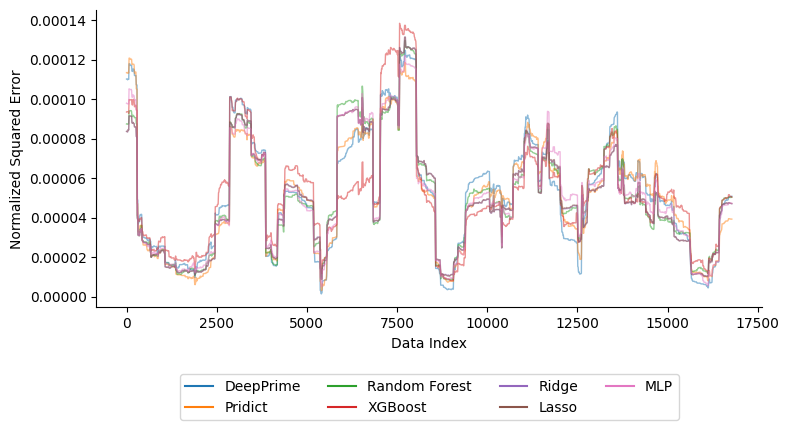

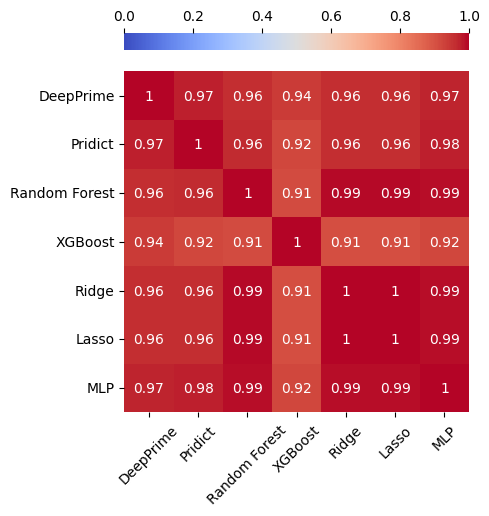

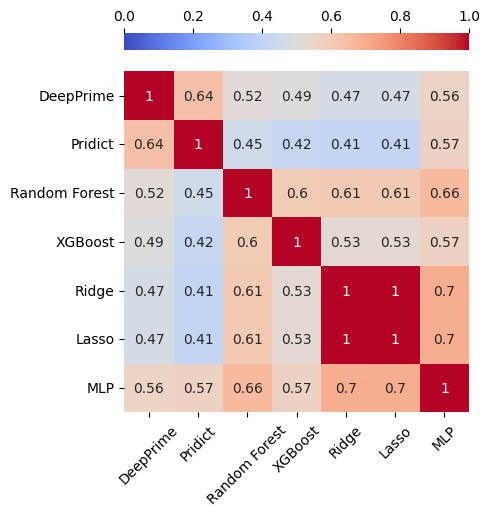

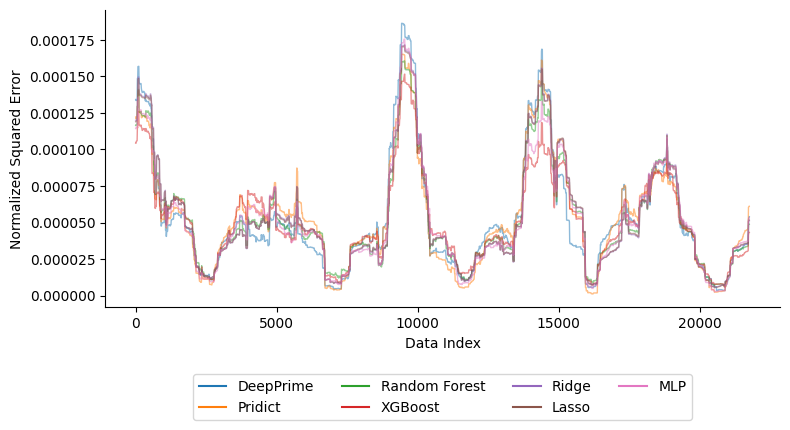

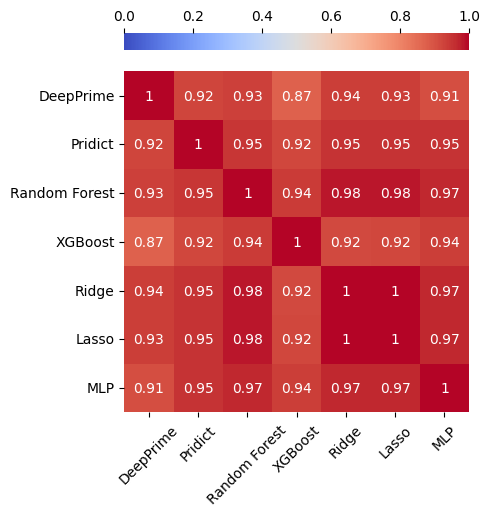

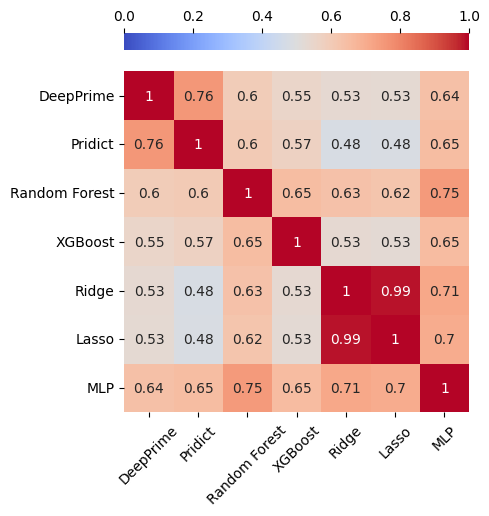

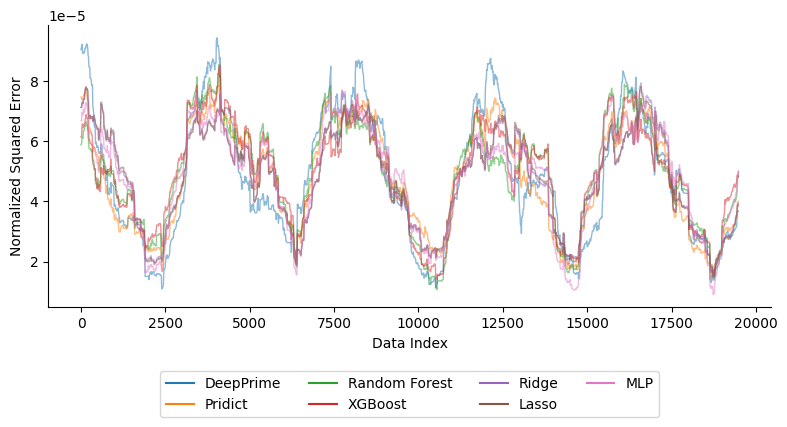

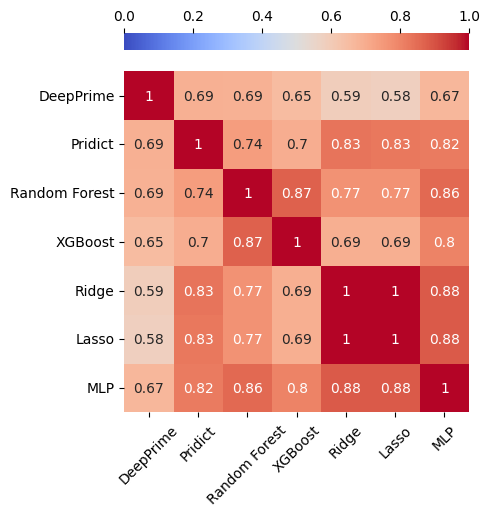

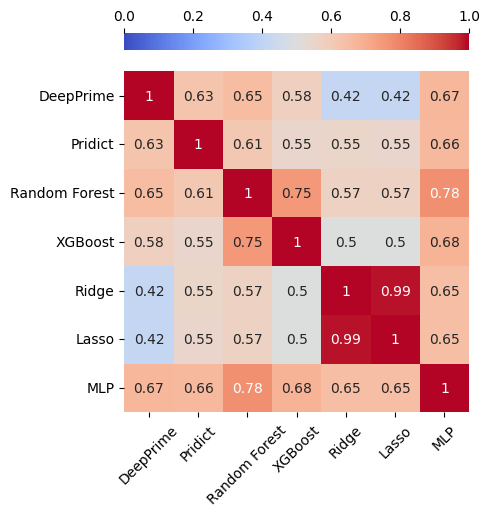

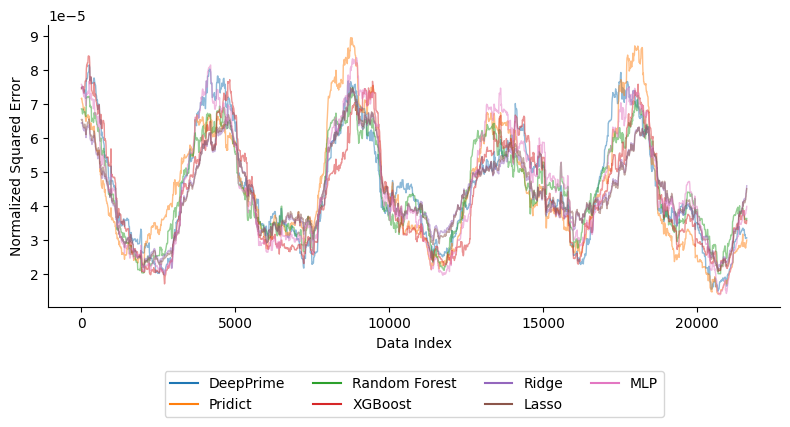

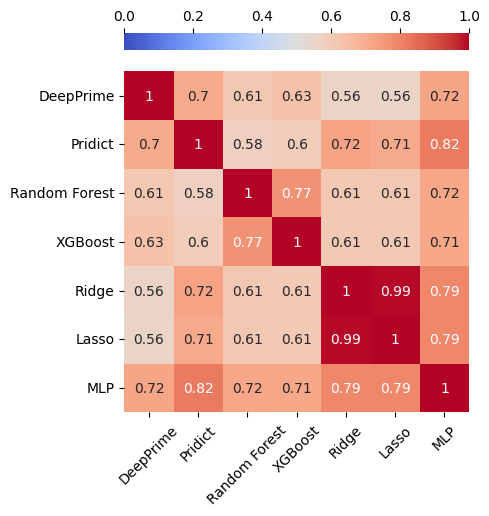

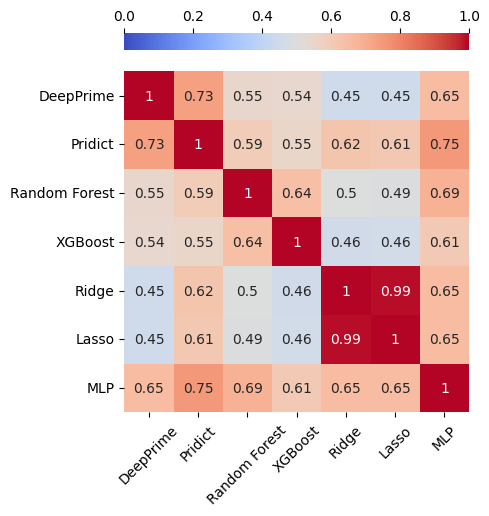

In [1]:
# load the pridict, deepprime and conventional ML models
import os
import sys
import numpy as np
import pandas as pd
import pickle
import torch
import skorch

from models.deepprime import predict_deep_prime
from models.pridict import predict_pridict
from models.conventional_ml_models import MLP
from collections import defaultdict

# suppress warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

for dataf in ['pd-adv-pe2', 'pd-k562-pe2', 'pd-k562mlh1dn-pe2', 'pd-hek293t-pe2']:
    data_dp = f'dp-{dataf}.csv'
    data_pd = f'pd-{dataf}.csv'

    prediction_pd, _ = predict_pridict(data_pd, num_features=24, device='cuda' if torch.cuda.is_available() else 'cpu', dropout=0)
    prediction_dp, _ = predict_deep_prime(data_dp, num_features=24, dropout=0)

    prediction_mlp = defaultdict(list)
    prediction_rf = defaultdict(list)
    prediction_xgb = defaultdict(list)
    prediction_ridge = defaultdict(list)
    prediction_lasso = defaultdict(list)

    data = pd.read_csv(f'models/data/conventional-ml/ml-{dataf}.csv')
    for i in range(5):
        fold = i + 1
        # load the test data
        X_test = data[data['fold'] == i].iloc[:, :24].values
        y_test = data[data['fold'] == i].iloc[:, -2].values
        # load the models
        with open(f'models/trained-models/conventional-ml/random_forest-{dataf}-fold-{fold}.pkl', 'rb') as f:
            rf = pickle.load(f)
        with open(f'models/trained-models/conventional-ml/xgboost-{dataf}-fold-{fold}.pkl', 'rb') as f:
            xgb = pickle.load(f)
        with open(f'models/trained-models/conventional-ml/ridge-{dataf}-fold-{fold}.pkl', 'rb') as f:
            ridge = pickle.load(f)
        with open(f'models/trained-models/conventional-ml/lasso-{dataf}-fold-{fold}.pkl', 'rb') as f:
            lasso = pickle.load(f)
        mlp_model = skorch.NeuralNetRegressor(
                module=MLP,
                device='cuda',
                module__hidden_layer_sizes = (64, 64,),
            )
        mlp_model.initialize()
        mlp_model.load_params(f_params=f'models/trained-models/conventional-ml/mlp-{dataf}-fold-{fold}.pkl')

        prediction_rf[i] = rf.predict(X_test)
        prediction_xgb[i] = xgb.predict(X_test)
        prediction_ridge[i] = ridge.predict(X_test)
        prediction_lasso[i] = lasso.predict(X_test)
        X_test = torch.tensor(X_test, dtype=torch.float32)
        prediction_mlp[i] = mlp_model.predict(X_test)


    # concatenate the predictions for each fold into a single array
    prediction_pd_list = np.concatenate([prediction_pd[fold].flatten() for fold in range(5)])
    prediction_dp_list = np.concatenate([prediction_dp[fold].flatten() for fold in range(5)])
    prediction_rf_list = np.concatenate([prediction_rf[fold] for fold in range(5)])
    prediction_xgb_list = np.concatenate([prediction_xgb[fold] for fold in range(5)])
    prediction_ridge_list = np.concatenate([prediction_ridge[fold] for fold in range(5)])
    prediction_lasso_list = np.concatenate([prediction_lasso[fold] for fold in range(5)])
    prediction_mlp_list = np.concatenate([prediction_mlp[fold].flatten() for fold in range(5)])

    print('Concatenated')

    # calculate the squared error from the predictions
    y_test = np.concatenate([data[data['fold'] == i].iloc[:, -2].values for i in range(5)])
    mse_dp = (y_test - prediction_dp_list)**2
    mse_pd = (y_test - prediction_pd_list)**2
    mse_rf = (y_test - prediction_rf_list)**2
    mse_xgb = (y_test - prediction_xgb_list)**2
    mse_ridge = (y_test - prediction_ridge_list)**2
    mse_lasso = (y_test - prediction_lasso_list)**2
    mse_mlp = (y_test - prediction_mlp_list)**2

    # print the mse of each model
    print('DeepPrime:', np.sum(mse_dp) / len(mse_dp))
    print('Pridict:', np.sum(mse_pd) / len(mse_pd))
    print('Random Forest:', np.sum(mse_rf) / len(mse_rf))
    print('XGBoost:', np.sum(mse_xgb) / len(mse_xgb))
    print('Ridge:', np.sum(mse_ridge) / len(mse_ridge))
    print('Lasso:', np.sum(mse_lasso) / len(mse_lasso))
    print('MLP:', np.sum(mse_mlp) / len(mse_mlp))

    # print the pearson correlation coefficient between model predictions and true values
    from scipy.stats import pearsonr
    print('DeepPrime:', pearsonr(y_test, prediction_dp_list)[0])
    print('Pridict:', pearsonr(y_test, prediction_pd_list)[0])
    print('Random Forest:', pearsonr(y_test, prediction_rf_list)[0])
    print('XGBoost:', pearsonr(y_test, prediction_xgb_list)[0])
    print('Ridge:', pearsonr(y_test, prediction_ridge_list)[0])
    print('Lasso:', pearsonr(y_test, prediction_lasso_list)[0])
    print('MLP:', pearsonr(y_test, prediction_mlp_list)[0])

    # normalize the squared error
    mse_dp = mse_dp / np.sum(mse_dp)
    mse_pd = mse_pd / np.sum(mse_pd)
    mse_rf = mse_rf / np.sum(mse_rf)
    mse_xgb = mse_xgb / np.sum(mse_xgb)
    mse_ridge = mse_ridge / np.sum(mse_ridge)
    mse_lasso = mse_lasso / np.sum(mse_lasso)
    mse_mlp = mse_mlp / np.sum(mse_mlp)


    # plot the smoothened error using a moving average
    import matplotlib.pyplot as plt
    import seaborn as sns

    def moving_average(x, w):
        return np.convolve(x, np.ones(w), 'valid') / w

    # downsample the data to improve visualization
    x = np.arange(len(mse_dp))
    downsample = 10
    x = x[::downsample]
    mse_dp = mse_dp[::downsample]
    mse_pd = mse_pd[::downsample]
    mse_rf = mse_rf[::downsample]
    mse_xgb = mse_xgb[::downsample]
    mse_ridge = mse_ridge[::downsample]
    mse_lasso = mse_lasso[::downsample]
    mse_mlp = mse_mlp[::downsample]

    fig, axes = plt.subplots(1, 1, figsize=(8, 4.5))
    window = 100
    # update x to match the length of the moving average
    x = x[:-(window - 1)]
    axes.plot(x, moving_average(mse_dp, window), label='DeepPrime')
    axes.plot(x, moving_average(mse_pd, window), label='Pridict')
    axes.plot(x, moving_average(mse_rf, window), label='Random Forest')
    axes.plot(x, moving_average(mse_xgb, window), label='XGBoost')
    axes.plot(x, moving_average(mse_ridge, window), label='Ridge')
    axes.plot(x, moving_average(mse_lasso, window), label='Lasso')
    axes.plot(x, moving_average(mse_mlp, window), label='MLP')
    # legend of two rows
    axes.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4)

    # set x and y labels
    axes.set_xlabel('Data Index')
    axes.set_ylabel('Normalized Squared Error')


    # reduce thickness and alpha of the lines
    for line in plt.gca().lines:
        line.set_linewidth(1)
        line.set_alpha(0.5)

    # remove the top and right spines
    axes.spines['top'].set_visible(False)
    axes.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.savefig(os.path.join('dissertation', 'figures', f'error_comparison_{dataf}.png'), dpi=300)

    # calculate the pearson correlation coefficient between each error and plot in heatmap
    from scipy.stats import pearsonr, spearmanr

    mse_dict = {
        'DeepPrime': mse_dp,
        'Pridict': mse_pd,
        'Random Forest': mse_rf,
        'XGBoost': mse_xgb,
        'Ridge': mse_ridge,
        'Lasso': mse_lasso,
        'MLP': mse_mlp,
    }

    fig, axes = plt.subplots(1, 1, figsize=(5, 5.5))

    correlation_matrix = np.zeros((len(mse_dict), len(mse_dict)))
    for i, mse in enumerate(mse_dict.values()):
        for j, mse2 in enumerate(mse_dict.values()):
            correlation_matrix[i, j] = pearsonr(mse, mse2)[0]

    # heat map with cbar in range 0 to 1, horizontal and on top of the plot
    sns.heatmap(correlation_matrix, ax=axes, cbar_kws={'location': 'top', 'pad': 0.05}, vmin=0, vmax=1, cmap='coolwarm', annot=True)

    # set cbar limit
    # cbar = axes.collections[0].colorbar
    # cbar.set_ticks([0, 0.5, 1])
    plt.xticks(np.arange(len(mse_dict)) + 0.5, mse_dict.keys(), rotation=45)
    plt.yticks(np.arange(len(mse_dict)) + 0.5, mse_dict.keys(), rotation=0)

    plt.tight_layout()
    plt.savefig(os.path.join('dissertation', 'figures', f'error_correlation_{dataf}_pearson.png'), dpi=300)

    fig, axes = plt.subplots(1, 1, figsize=(5, 5.5))

    correlation_matrix = np.zeros((len(mse_dict), len(mse_dict)))
    for i, mse in enumerate(mse_dict.values()):
        for j, mse2 in enumerate(mse_dict.values()):
            # spearman correlation
            correlation_matrix[i, j] = spearmanr(mse, mse2)[0]

    # heat map with cbar in range 0 to 1, horizontal and on top of the plot
    sns.heatmap(correlation_matrix, ax=axes, cbar_kws={'location': 'top', 'pad': 0.05}, vmin=0, vmax=1, cmap='coolwarm', annot=True)

    plt.xticks(np.arange(len(mse_dict)) + 0.5, mse_dict.keys(), rotation=45)
    plt.yticks(np.arange(len(mse_dict)) + 0.5, mse_dict.keys(), rotation=0)

    # save the plots
    plt.tight_layout()
    plt.savefig(os.path.join('dissertation', 'figures', f'error_correlation_{dataf}_spearman.png'), dpi=300)